In [46]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [47]:
df=pd.read_excel('stringaprobo.xlsx')

In [48]:
df.columns

Index(['carrera', 'nombre_carrera', 'legajo', 'ingreso', 'sexo',
       'pais_procedencia', 'prov_procedencia', 'edad', 'estado_civil',
       'cant_hijos', 'vive_con', 'tiene_beca', 'aporte_familiar',
       'obra_social', 'trabajo', 'padre_vive', 'padre_ult_est_curs',
       'padre_trabajo', 'madre_vive', 'madre_ult_est_curs', 'madre_trabajo',
       'dep_practica', 'idioma_ingles', 'idioma_franc', 'idioma_portu',
       'idioma_itali', 'idioma_aleman', 'cantidad_idiomas', 'matcursprisem',
       'fechaapro_matematica_al_21-10-2017', 'cantmataprob_al_21-10-2017',
       'promedio_con_aplaz_al_21-10-2017', 'promedio_sin_aplaz_al_21-10-2017'],
      dtype='object')

In [49]:
df1=df.drop(columns=['carrera','legajo','cantidad_idiomas'])

In [50]:
df1

,nombre_carrera,ingreso,sexo,pais_procedencia,prov_procedencia,edad,estado_civil,cant_hijos,vive_con,tiene_beca,...,idioma_ingles,idioma_franc,idioma_portu,idioma_itali,idioma_aleman,matcursprisem,fechaapro_matematica_al_21-10-2017,cantmataprob_al_21-10-2017,promedio_con_aplaz_al_21-10-2017,promedio_sin_aplaz_al_21-10-2017
0,Ciencias Biológicas,2017,h,argentina,cordoba,45,casado,0,solo,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,0,1,0,2,1
1,Ciencias Geológicas,2017,m,argentina,cordoba,25,soltero,0,familia de origen,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,1,1,1,2,1
2,Ingeniería en Computación,2014,h,argentina,cordoba,23,soltero,0,familia de origen,n,...,bueno-muy bueno,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,2,0,2,2,1
3,Ingeniería Civil,2016,h,argentina,cordoba,22,soltero,0,solo,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,0,0,3,2,1
4,Ciencias Biológicas,2015,h,argentina,otra,26,soltero,0,solo,si,...,bueno-muy bueno,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,0,1,0,2,1
5,Ingeniería Civil,2015,h,argentina,cordoba,31,soltero,0,solo,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,2,1,2,2,1
6,Ingeniería Aeronáutica,2017,h,argentina,otra,31,soltero,0,familia de origen,n,...,bueno-muy bueno,bueno-muy bueno,basico-desonoce,basico-desonoce,bueno-muy bueno,4,0,5,4,3
7,Ciencias Biológicas,2017,m,argentina,cordoba,21,soltero,0,familia de origen,n,...,bueno-muy bueno,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,1,0,7,4,3
8,Ingeniería Industrial,2017,h,argentina,cordoba,21,soltero,0,familia de origen,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,2,1,2,4,3
9,Ingeniería Biomédica,2016,m,argentina,cordoba,23,soltero,0,solo,n,...,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,basico-desonoce,0,1,0,2,1


In [51]:
inputs = pd.get_dummies(df1, columns=['nombre_carrera', 'ingreso', 'sexo', 'pais_procedencia',
       'prov_procedencia', 'edad', 'estado_civil', 'cant_hijos', 'vive_con',
       'tiene_beca', 'aporte_familiar', 'obra_social', 'trabajo', 'padre_vive',
       'padre_ult_est_curs', 'padre_trabajo', 'madre_vive',
       'madre_ult_est_curs', 'madre_trabajo', 'dep_practica', 'idioma_ingles',
       'idioma_franc', 'idioma_portu', 'idioma_itali', 'idioma_aleman'])



In [52]:
inputs.columns

Index(['matcursprisem', 'fechaapro_matematica_al_21-10-2017',
       'cantmataprob_al_21-10-2017', 'promedio_con_aplaz_al_21-10-2017',
       'promedio_sin_aplaz_al_21-10-2017',
       'nombre_carrera_Ciencias Biológicas',
       'nombre_carrera_Ciencias Geológicas', 'nombre_carrera_Constructor',
       'nombre_carrera_Ingeniería Aeronáutica',
       'nombre_carrera_Ingeniería Ambiental',
       ...
       'idioma_ingles_basico-desonoce', 'idioma_ingles_bueno-muy bueno',
       'idioma_franc_basico-desonoce', 'idioma_franc_bueno-muy bueno',
       'idioma_portu_basico-desonoce', 'idioma_portu_bueno-muy bueno',
       'idioma_itali_basico-desonoce', 'idioma_itali_bueno-muy bueno',
       'idioma_aleman_basico-desonoce', 'idioma_aleman_bueno-muy bueno'],
      dtype='object', length=137)

In [53]:
target=np.array(inputs['fechaapro_matematica_al_21-10-2017'])
inputs=inputs.drop(columns=['matcursprisem','fechaapro_matematica_al_21-10-2017', 
                            'cantmataprob_al_21-10-2017','promedio_con_aplaz_al_21-10-2017', 
                            'promedio_sin_aplaz_al_21-10-2017'])


In [54]:
inputs_list=list(inputs.columns)
inputs=np.array(inputs)

In [55]:
from sklearn.model_selection import train_test_split

train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.3, random_state = 42)

In [56]:
print('Training Features Shape:', train_inputs.shape)
print('Training Labels Shape:', train_target.shape)
print('Testing Features Shape:', test_inputs.shape)
print('Testing Labels Shape:', test_target.shape)

Training Features Shape: (1659, 132)
Training Labels Shape: (1659,)
Testing Features Shape: (711, 132)
Testing Labels Shape: (711,)


In [69]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# model
rf = RandomForestClassifier(random_state = 42, n_jobs = -1, verbose=True)

#Grid Search
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators': [10, 100],'max_depth':[10, 14]}
grid_rf = GridSearchCV(rf, param_grid = grid_values)
grid_rf.fit(train_inputs, train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Paral

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=True, warm_start=False),
             iid='warn', n_jobs=None,
             param_g

In [70]:
# Use the forest's predict method on the test data
predictions = grid_rf.predict(test_inputs)
# Calculate the absolute errors
errors = abs(predictions - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.28


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [71]:
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / test_target)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

In [72]:
print("Best parameters set found on development set:")
print()
print(grid_rf.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid_rf.cv_results_['mean_test_score']
stds = grid_rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_rf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'max_depth': 10, 'n_estimators': 100}

Grid scores on development set:

0.705 (+/-0.017) for {'max_depth': 10, 'n_estimators': 10}
0.719 (+/-0.036) for {'max_depth': 10, 'n_estimators': 100}
0.703 (+/-0.051) for {'max_depth': 14, 'n_estimators': 10}
0.719 (+/-0.040) for {'max_depth': 14, 'n_estimators': 100}



In [73]:
#predictions

In [74]:
#predictions - test_target

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [76]:
accuracy_score(test_target, predictions)

0.7215189873417721

In [77]:
cm=confusion_matrix(test_target, predictions)
print (cm)

[[405  50]
 [148 108]]


In [78]:
import matplotlib.pyplot as plt
import seaborn as sn

                      Predicted
        TC4TL event               not-TC4TL event


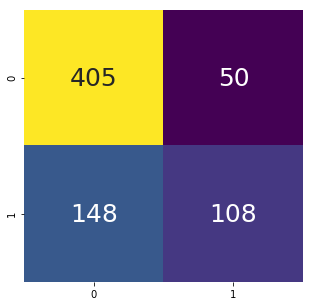

In [79]:
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sn.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=True, 
           yticklabels=True,
           cmap="viridis", 
           cbar=False)
print("                      Predicted")
print("        TC4TL event","              not-TC4TL event")
plt.show()

In [80]:
# Get numerical feature importances
importances = list(grid_rf.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(inputs_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: aporte_familiar_sin ayuda familiar Importance: 0.07
Variable: edad_21              Importance: 0.05
Variable: nombre_carrera_Ciencias Biológicas Importance: 0.04
Variable: ingreso_2017         Importance: 0.03
Variable: edad_20              Importance: 0.03
Variable: aporte_familiar_aporte familiar y otro Importance: 0.03
Variable: trabajo_no           Importance: 0.03
Variable: trabajo_si           Importance: 0.03
Variable: madre_ult_est_curs_primario Importance: 0.03
Variable: nombre_carrera_Técnico Mecánico Electricista Importance: 0.02
Variable: obra_social_no       Importance: 0.02
Variable: obra_social_si       Importance: 0.02
Variable: padre_ult_est_curs_primario Importance: 0.02
Variable: madre_ult_est_curs_univesitario-superior Importance: 0.02
Variable: idioma_ingles_basico-desonoce Importance: 0.02
Variable: idioma_ingles_bueno-muy bueno Importance: 0.02
Variable: nombre_carrera_Ciencias Geológicas Importance: 0.01
Variable: nombre_carrera_Constructor Importance: